In [5]:
import pandas as pd
import numpy as np
from data import read_data,read_g5
from sklearn.decomposition import PCA

In [3]:
id2word = [x.strip() for x in open('vocab.txt')]
w2id = {w:i for i,w in enumerate(id2word)}
embeddings = np.loadtxt('wv.vec')

In [4]:
graphData = read_data()
g5 = read_g5()

In [6]:
pca  = PCA(n_components=2)
twoD = pca.fit_transform(embeddings)

In [7]:
twoD

array([[-1.22014305,  0.34018223],
       [-1.78961204, -0.09769988],
       [-1.14884564,  0.33398866],
       ...,
       [-0.17848362,  0.07600831],
       [-0.11674821,  0.1229878 ],
       [-0.2081045 ,  0.10545208]])

In [18]:
g5_indices = [w2id[x] for x in g5['HASH_ID'] if x in w2id]
non_g5_indices = [i for i in range(twoD.shape[0]) if i not in g5_indices]

In [19]:
twoD[non_g5_indices]

array([[-1.22014305,  0.34018223],
       [-1.78961204, -0.09769988],
       [-1.14884564,  0.33398866],
       ...,
       [-0.17848362,  0.07600831],
       [-0.11674821,  0.1229878 ],
       [-0.2081045 ,  0.10545208]])

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (18,16)

sns.set()

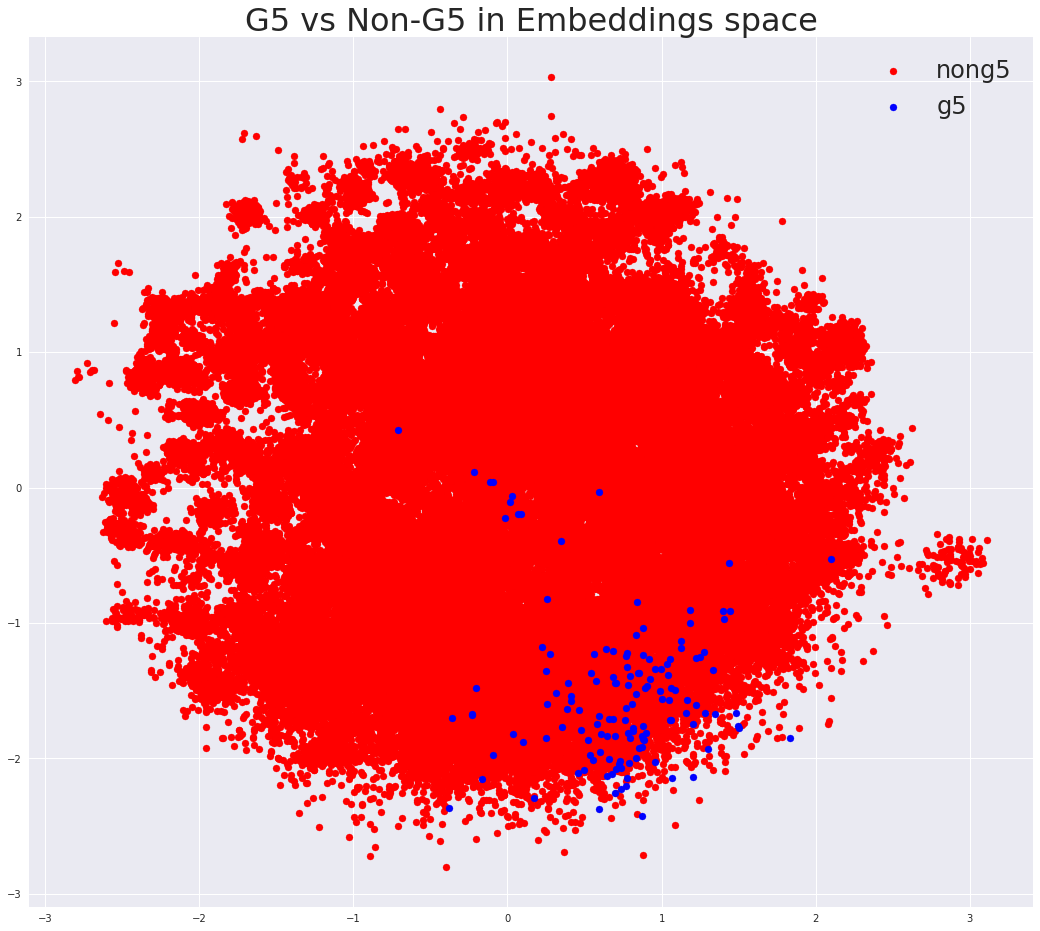

In [38]:

nong_g5_points = twoD[non_g5_indices]
plt.scatter(nong_g5_points[:,1], nong_g5_points[:,0], color='r',label='nong5')
g5_points = twoD[g5_indices]
plt.scatter(g5_points[:,1], g5_points[:,0], color='b', label='g5')
plt.legend(fontsize=24)
plt.title('G5 vs Non-G5 in Embeddings space', fontsize=32)